# Python Kullanarak Keşifsel Veri Analizi - Bir Örnek Çalışma

*Stack Overflow Yıllık Geliştirici Anketi 2020'den alınan yanıtları analiz etme*

![](https://i.imgur.com/qXhHKqv.png)

### Python ile Veri Analizi Eğitiminin 9. Kısmı

Bu eğitim serisi, Python programlama dilini kullanarak programlama ve veri analizine yeni başlayanlara uygun bir giriş niteliğindedir. Bu eğitimler, pratik ve kodlama odaklı bir yaklaşım benimsiyor. Materyalleri öğrenmenin en iyi yolu, kodu yürütmek ve kendimizin denemesidir. Serinin tamamına buradan göz atabiliriz: 

1. Python ile İlk Adımlar
2. Değişkenler ve Veri Türleri için Hızlı Bir Tur
3. Koşullu İfadeler ve Döngüler Kullanarak Dallanma
4. Fonksiyonları Kullanarak Yeniden Kullanılabilir Kod Yazma
5. Dosyalardan Okuma ve Dosyalara Yazma
6. Python ve Numpy ile Sayısal Hesaplama
7. Pandas Kullanarak Tablo Verilerini Analiz Etme
8. Matplotlib ve Seaborn kullanarak Veri Görselleştirme
9. Keşifsel Veri Analizi - Bir Vaka Çalışması


Bu eğitimde aşağıdaki konular ele alınmaktadır:

- Bir veri seti seçme ve indirme
- Veri hazırlama ve temizleme
- Keşif analizi ve görselleştirme
- İlginç sorular sorma ve cevaplama
- Çıkarımları özetleme ve sonuç çıkarma

## Giriş

Bu eğitimde, StackOverflow geliştirici (developer) anketi veri kümesini analiz edeceğiz. Veri kümesi, StackOverflow tarafından yürütülen yıllık bir ankete verilen yanıtları içerir. Ham verileri (raw data) ve resmi analizi burada bulabiliriz: https://insights.stackoverflow.com/survey.

Veri kümesini Jupyter'e ya da Google Colab'a almak için birkaç seçenek vardır:

- CSV'yi manuel olarak indirin ve Jupyter'ın ya da Google Colab'ın GUI'si aracılığıyla yükleyelim.
- Ham bir URL'den CSV dosyalarını indirmek için `urllib.request`'ten `urlretrieve` fonksiyonunu kullanalım. 
- Bir yardımcı kütüphane kullanalım, örneğin, [`opendatasets`](https://github.com/JovianML/opendatasets), derlenmiş veri kümeleri koleksiyonunu içerir ve doğrudan indirme için bir yardımcı fonksiyon sağlar.

Dosyaları indirmek için `opendatasets` yardımcı kütüphanesini kullanacağız.

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:03, 23977599.66it/s]                               


16384it [00:00, 85118.07it/s]           


8192it [00:00, 48015.89it/s]            


Veri kümesinin `stackoverflow-developer-survey-2020` dizinine indirildiğini doğrulayalım ve veri kümesindeki dosyaların listesini alalım.

In [ ]:
import os

In [ ]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

Jupyter ya da Google Colab'da "Dosya" > "Aç" menü seçeneğini kullanarak indirilen dosyalar arasında geçiş yapabiliriz. Veri kümesi üç dosya içeriyor gibi görünüyor:

- `README.txt` - Veri kümesi hakkında bilgi
- `survey_results_schema.csv` - Soruların listesi ve her soru için kısa kodlar
- `survey_results_public.csv` - Sorulara verilen yanıtların tam listesi

Pandas kütüphanesini kullanarak CSV dosyalarını yükleyelim. Analize hazır bir veri çerçevesi hazırlamak için temizleyebileceğimiz, filtreleyebileceğimiz ve değiştirebileceğimiz işlenmemiş veriler olduğunu belirtmek için veri çerçevesi için `survey_raw_df` adını kullanacağız.

In [ ]:
import pandas as pd

In [ ]:
anket_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [ ]:
anket_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


Veri kümesi, (birçok soru isteğe bağlı olsa da) 60 soruya 64.000'den fazla yanıt içerir. Yanıtlar, kişisel olarak tanımlanabilir bilgileri kaldırmak için anonimleştirildi ve her yanıtlayana rastgele bir yanıtlayan kimliği verildi.

Veri çerçevesindeki sütunların listesini görelim.

In [ ]:
anket_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Sorular için kısa kodların sütun adları olarak kullanıldığı görülüyor.

Her sorunun tam metnini görmek için şema dosyasına başvurabiliriz. Şema dosyası yalnızca iki sütun içerir: `Column` ve `QuestionText`. İndeks olarak `Column` ve değer olarak `QuestionText` ile Pandas Series olarak yükleyebiliriz.

In [ ]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [ ]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Artık `anket_raw_df` içindeki herhangi bir sütun için tam soru metnini almak için `schema_raw`'ı kullanabiliriz.

In [ ]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [ ]:
schema_raw['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [ ]:
schema_raw['OrgSize']

'Approximately how many people are employed by the company or organization you currently work for?'

Şimdi veri setini yükledik. Analizimiz için verileri ön işleme ve temizlemenin bir sonraki adımına geçmeye hazırız.

## Veri Hazırlama ve Veri Temizleme

Anket yanıtları çok sayıda bilgi içerse de, analizimizi aşağıdaki alanlarla sınırlayacağız:

- Ankete katılanların ve küresel programlama topluluğunun demografisi
- Programlama becerilerinin, deneyimlerinin ve tercihlerinin dağılımı
- İstihdamla ilgili bilgiler, tercihler ve görüşler

Analizimiz için ilgili verileri içeren bir sütun alt kümesi seçelim.

In [ ]:
secili_sutunlar = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [ ]:
len(secili_sutunlar)

20

Bu sütunlardan verilerin bir kopyasını yeni bir veri çerçevesi `anket_df` içine çıkaralım. Orijinal veri çerçevesini etkilemeden daha fazla değişiklik yapmaya devam edebiliriz.

In [ ]:
anket_df = anket_raw_df[secili_sutunlar].copy()

In [ ]:
schema = schema_raw[secili_sutunlar]

Veri çerçevesi hakkında bazı temel bilgileri görelim.

In [ ]:
anket_df.shape

(64461, 20)

In [ ]:
anket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Çoğu sütun, farklı türlerde değerler veya boş değerler (`NaN`) içerdiklerinden, `object` veri türüne sahiptir. Her sütun için Non-Null sayısı toplam satır sayısından (64461) düşük olduğundan, her sütunun bazı boş değerler içerdiği görülüyor. Boş değerlerle ilgilenmemiz ve duruma göre her sütun için veri türünü manuel olarak ayarlamamız gerekecek.

Diğer birkaç sütun çoğunlukla sayısal değerlere sahip olmasına rağmen, sütunlardan yalnızca ikisi (`Age` ve `WorkWeekHrs`) sayısal sütunlar  olarak algılandı. Analizimizi kolaylaştırmak için, sayısal olmayan herhangi bir değeri yok sayarak diğer bazı sütunları sayısal veri türlerine dönüştürelim. Sayısal olmayanlar `NaN`'a dönüştürülür.

In [ ]:
anket_df['Age1stCode'] = pd.to_numeric(anket_df.Age1stCode, errors='coerce')
anket_df['YearsCode'] = pd.to_numeric(anket_df.YearsCode, errors='coerce')
anket_df['YearsCodePro'] = pd.to_numeric(anket_df.YearsCodePro, errors='coerce')

Şimdi sayısal sütunlarla ilgili bazı temel istatistikleri görelim.

In [ ]:
anket_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Minimum değer 1 ve maksimum değer 279 olduğu için yaş sütununda bir sorun var gibi görünüyor. Bu, anketlerde sık görülen bir sorundur: Yanıtlar, yanıt verirken yanlışlıkla veya kasıtlı hatalar nedeniyle geçersiz değerler içerebilir. Basit bir düzeltme, yaşın 100 yıldan yüksek veya 10 yıldan küçük olduğu satırları geçersiz anket yanıtları olarak yok saymak olacaktır. Bunu, [burada açıklandığı gibi](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/). `.drop` yöntemini kullanarak yapabiliriz.

In [ ]:
anket_df.drop(anket_df[anket_df.Age < 10].index, inplace=True)
anket_df.drop(anket_df[anket_df.Age > 100].index, inplace=True)

Aynısı `WorkWeekHrs` için de geçerlidir. Sütunun değerinin 140 saatten yüksek olduğu girişleri yok sayalım. (günde ~20 saat).

In [ ]:
anket_df.drop(anket_df[anket_df.WorkWeekHrs > 140].index, inplace=True)

Cinsiyet sütunu ayrıca birden fazla seçeneğin seçilmesine de olanak tanır. Analizimizi basitleştirmek için birden fazla seçenek içeren değerleri kaldıracağız.

In [ ]:
anket_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [ ]:
import numpy as np

In [ ]:
anket_df.where(~(anket_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

Şimdi analiz için veri setini temizledik ve hazırladık. Veri çerçevesinden bir satır örneğine bakalım.

In [ ]:
anket_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
54356,Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,25.0,20.0,C#;C++;HTML/CSS;JavaScript;SQL;TypeScript,Haskell;Java;JavaScript;Rust;Scala;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,NaN,NaN,NaN,Slightly satisfied,Remote work options;How widely used or impactf...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
39211,Ukraine,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,11.0,7.0,3.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Engineer, data",NaN,Very dissatisfied,NaN,NaN,Fairly important
58490,Ukraine,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,6.0,2.0,HTML/CSS;JavaScript;PHP;SQL;TypeScript,HTML/CSS;JavaScript;PHP;SQL;TypeScript,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",9.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Very important
945,Canada,14.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,11.0,1.0,NaN,C#;Python,C#;C++;Dart;Go;HTML/CSS;Java;JavaScript;Python,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,"Industry that I’d be working in;Languages, fra...",NaN,NaN
30801,Denmark,27.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",No,12.0,7.0,3.0,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;J...,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, full-stack;Scientist;System adminis...",38.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
41719,Hungary,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,19.0,10.0,5.0,Assembly;Bash/Shell/PowerShell;C;C++;Haskell;H...,Haskell;Rust;Scala;SQL,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",38.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Somewhat important
55499,Kazakhstan,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,17.0,12.0,HTML/CSS;Java;JavaScript;SQL;TypeScript,Dart;HTML/CSS;Java;JavaScript;SQL;TypeScript,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, full-stack;Deve...",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
33436,United States,23.0,Man,"Associate degree (A.A., A.S., etc.)","A natural science (such as biology, chemistry,...",Yes,14.0,8.0,1.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Juli...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Data scientist or mac...,50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Fairly important
45687,New Zealand,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,7.0,1.0,Bash/Shell/PowerShell;JavaScript;Python,C#;Go;Rust,Once a year,Go for a walk or other physical activity,Employed full-time,"Develo

## Keşifsel Analiz ve Görselleştirme

Anket yanıtları hakkında sorular sormadan önce, yanıtlayanların demografik özelliklerini, yani ülke, yaş, cinsiyet, eğitim düzeyi, istihdam düzeyi vb. anlamamıza yardımcı olacaktır. Anketin dünya çapındaki programlama topluluğunu ne kadar temsil ettiğini anlamak için bu değişkenleri araştırmak önemlidir. Bu ölçeğin bir anketi genellikle bazı [seçim yanlılığı](https://en.wikipedia.org/wiki/Selection_bias) olma eğilimindedir.

`matplotlib.pyplot` ve `seaborn` dosyalarını içe aktararak başlayalım.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Ülke

Ankette yanıt verilen ülke sayısına bakalım ve en fazla yanıt alan on ülkeyi sıralayalım.

In [ ]:
schema.Country

'Where do you live?'

In [ ]:
anket_df.Country.nunique()

183

`value_counts` yöntemini kullanarak en fazla yanıt veren ülkeleri belirleyebiliriz.

In [ ]:
en_fazla_yanit_veren_ulkeler = anket_df.Country.value_counts().head(15)
en_fazla_yanit_veren_ulkeler

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

Bu bilgiyi bir çubuk grafik kullanarak görselleştirebiliriz.

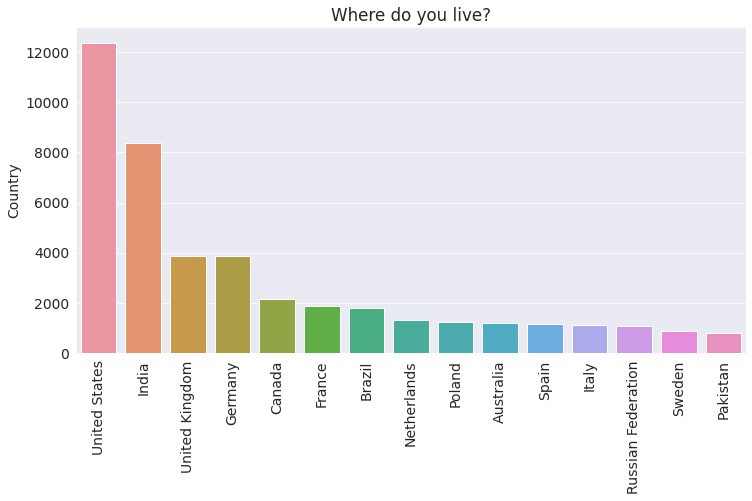

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title(schema.Country)
sns.barplot(x=en_fazla_yanit_veren_ulkeler.index, y=en_fazla_yanit_veren_ulkeler);

Muhtemelen anket İngilizce olduğu ve bu ülkelerde İngilizce konuşan nüfus en yüksek olduğu için, orantısız bir şekilde yüksek sayıda katılımcı ABD ve Hindistan'dan geliyor. Anketin, özellikle İngilizce konuşulmayan ülkelerdeki küresel programlama topluluğunu temsil etmeyebileceğini şimdiden görebiliyoruz. İngilizce konuşulmayan ülkelerden gelen programcılar hemen hemen kesinlikle yeterince temsil edilmiyor.

**Alıştırma**:

İngilizce konuşulan ve İngilizce konuşulmayan ülkelerden gelen yanıtların yüzdesini bulmaya çalışın. [Farklı ülkelerde konuşulan dillerin bu listesini](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv) kullanabiliriz.

### Yaş

Katılımcıların yaş dağılımı, bakılması gereken bir diğer önemli faktördür. Görselleştirmek için bir histogram kullanabiliriz.

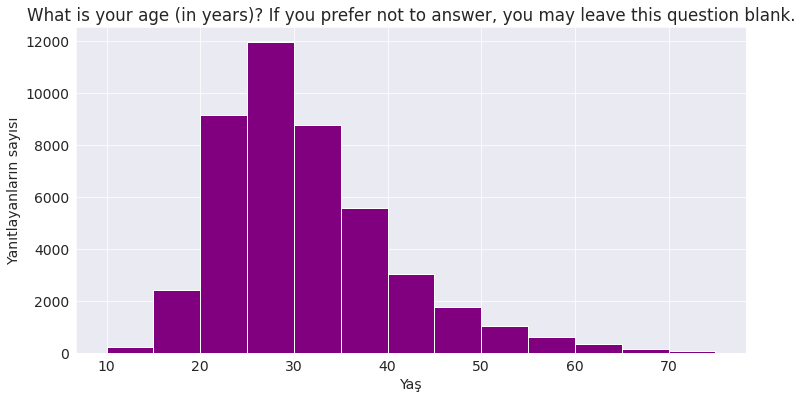

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Yaş')
plt.ylabel('Yanıtlayanların sayısı')

plt.hist(anket_df.Age, bins=np.arange(10,80,5), color='purple');

Ankete katılanların büyük bir yüzdesinin 20-45 yaşları arasında olduğu görülmektedir. Genel olarak programlama topluluğunu biraz temsil ediyor. Son 20 yılda pek çok genç bilgisayar bilimini çalışma alanı veya meslek olarak aldı.

**Alıştırma**: Farklı yaş grupları için anket sonuçlarını analiz etmek ve karşılaştırmak isterseniz, yanıtları yaşa (veya yaş grubuna) göre filtrelemek isteyebilirsiniz. `10 yaşından az`, `10-18 yaş`, `18-30 yaş`, `30-45 yaş`, `45-60 yaş` ve `60'dan daha yaşlı` gibi değerleri içeren AgeGroup adlı yeni bir sütun oluşturalım. Ardından, bu notebook'un geri kalanındaki analizi her yaş grubu için tekrarlayalım.

### Cinsiyet

Cinsiyet için verilen yanıtların dağılımına bakalım. Kadınların ve ikili olmayan cinsiyetlerin programlama topluluğunda yeterince temsil edilmediği bilinen bir gerçektir, bu nedenle burada simetrik olmayan bir dağılım görmeyi bekleyebiliriz.

In [ ]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [ ]:
cinsiyet_sayilari = anket_df.Gender.value_counts()
cinsiyet_sayilari

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Bir pasta grafiği, dağılımı görselleştirmenin harika bir yolu olacaktır.

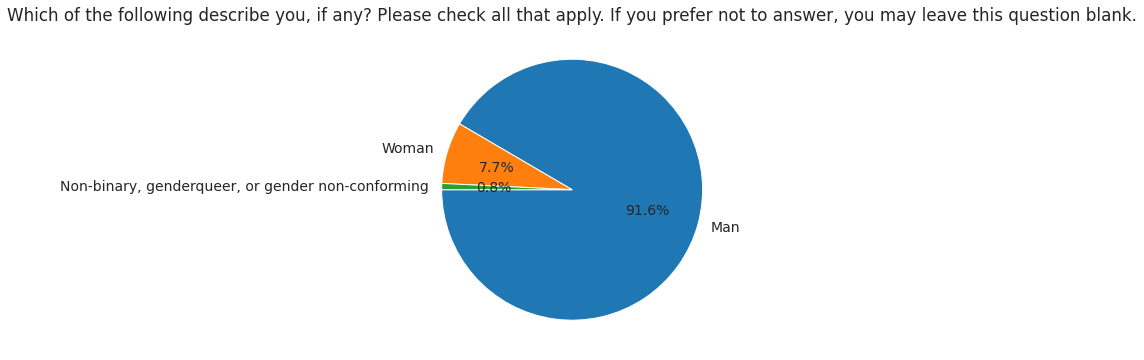

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(cinsiyet_sayilari, labels=cinsiyet_sayilari.index, autopct='%1.1f%%', startangle=180);

Soruyu yanıtlayan anket katılımcılarının yalnızca yaklaşık %8'i kadın veya ikili olmayan olarak tanımlamaktadır. Bu sayı, programlama topluluğundaki kadınların ve ikili olmayan cinsiyetlerin genel yüzdesinden daha düşüktür - yaklaşık %12 olduğu tahmin edilmektedir.

**Alıştırma**: Anket yanıtlarını ve tercihlerini cinsiyetler arasında karşılaştırmak ilginç olurdu. Bu analizi, bu arızalarla tekrarlayalım. Göreceli eğitim seviyeleri cinsiyetler arasında nasıl farklılık gösteriyor? Maaşlar nasıl değişiyor? [Veri Biliminde Cinsiyet Ayrımı](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) hakkındaki bu analizi faydalı bulabilirsiniz.

### Eğitim Seviyesi

Bilgisayar bilimlerinde örgün eğitim, programcı olmak için genellikle temel bir gereklilik olarak kabul edilir. Ancak, programlamayı öğrenmek için çevrimiçi olarak sunulan birçok ücretsiz kaynak ve eğitim vardır. Bu konuda bir fikir edinmek için katılımcıların eğitim düzeylerini karşılaştıralım. Burada yatay bir çubuk grafiği kullanacağız.

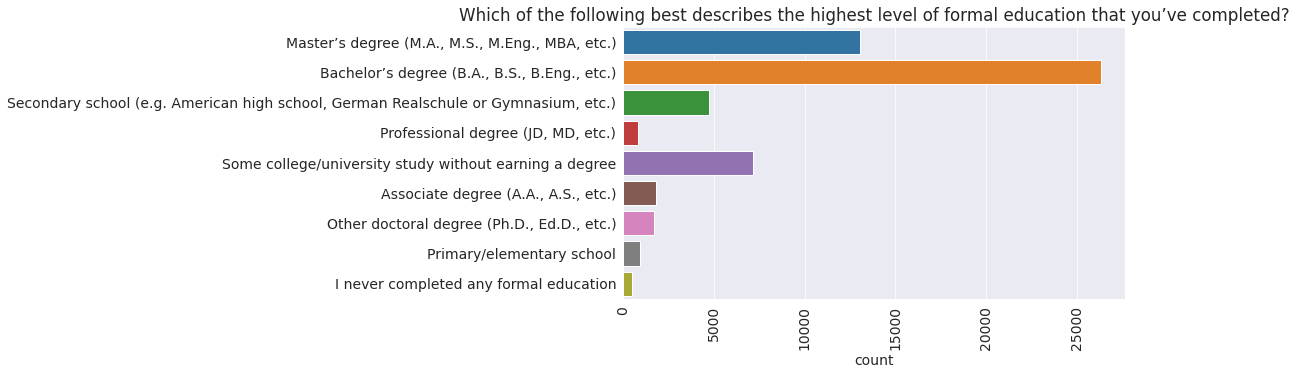

In [ ]:
sns.countplot(y=anket_df.EdLevel)
plt.xticks(rotation=90);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Ankete katılanların yarısından fazlasının bir lisans veya yüksek lisans derecesine sahip olduğu görülüyor, bu nedenle çoğu programcı biraz üniversite eğitimi almış gibi görünüyor. Ancak, sadece bu grafikten, bilgisayar bilimi diplomasına sahip olup olmadıkları net değil.

**Alıştırma**: Grafik şu anda her seçenek için yanıt verenlerin sayısını göstermektedir. Bunun yerine yüzdeyi gösterecek şekilde değiştirebilir miyiz? Ayrıca, erkekler ve kadınlar için her derece için yüzdeleri karşılaştırmayı deneyelim.

Ayrıca lisans bölümlerini de çizelim. Ancak bu sefer sayıları yüzdelere dönüştüreceğiz ve sıralamayı daha kolay hale getirmek için değerleri sıralayacağız.

In [ ]:
schema.UndergradMajor

'What was your primary field of study?'

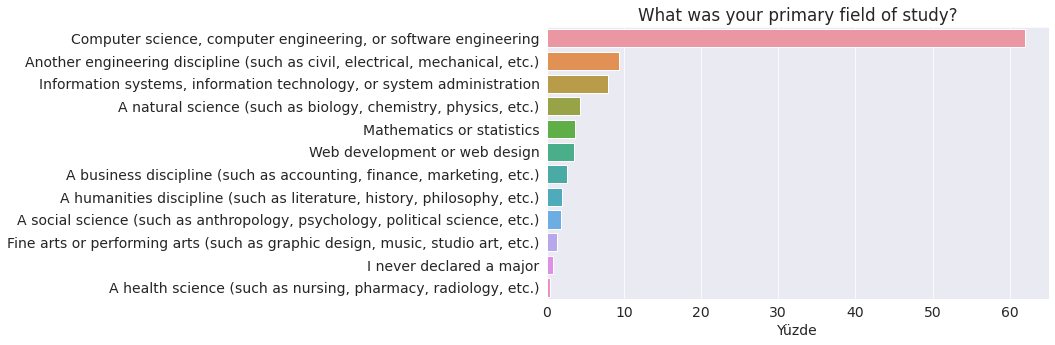

In [ ]:
lisans_yuzdesi = anket_df.UndergradMajor.value_counts() * 100 / anket_df.UndergradMajor.count()

sns.barplot(x=lisans_yuzdesi, y=lisans_yuzdesi.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Yüzde');

Üniversite diplomasına sahip programcıların %40'ının bilgisayar bilimi dışında bir çalışma alanına sahip olduğu ortaya çıktı - bu çok cesaretlendirici. Bir üniversite eğitimi genel olarak yardımcı olsa da, başarılı bir programcı olmak için bilgisayar bilimi alanında yüksek lisans yapmanıza gerek olmadığını öne sürüyor gibi görünüyor.

**Alıştırma**: `NEWEdImpt` sütununu, üniversite diplomasına sahip olan ve olmayanlara kıyasla yanıtlayanlar için analiz edelim. Herhangi bir görüş farkı görüyor muyuz?

In [ ]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

### Employment

Serbest çalışma (freelancing) veya sözleşmeli çalışma (contract work), programcılar arasında yaygın bir seçimdir. Bu nedenle tam zamanlı, yarı zamanlı ve serbest çalışma arasındaki dağılımı karşılaştırmak ilginç olacaktır. `İstihdam` sütunundaki verileri görselleştirelim.

In [ ]:
schema.Employment

'Which of the following best describes your current employment status?'

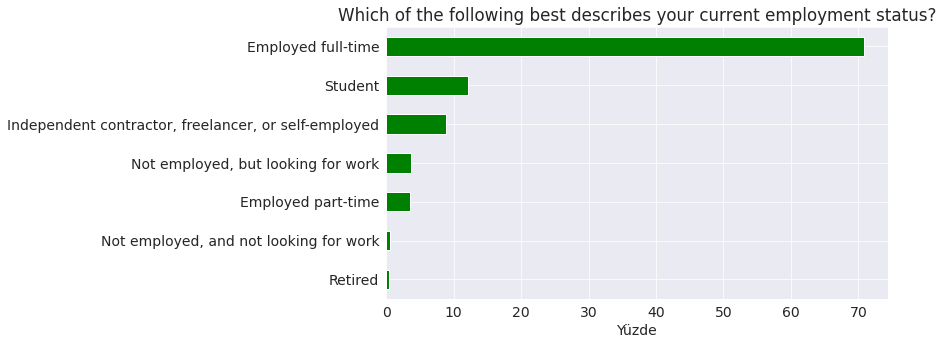

In [ ]:
(anket_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Yüzde');

Ankete katılanların %10'a yakınının yarı zamanlı veya serbest çalışan olarak çalıştığı görülmektedir.

**Alıştırma**: `Enthusiast` (öğrenci veya çalışmıyor ancak iş arıyor, `Professional` (tam zamanlı, yarı zamanlı veya serbest çalışan) ve `Other` (çalışmıyor veya emekli değil) değerlerini içeren yeni bir `EmploymentType` sütunu ekleyelim. Aşağıdaki grafiklerin her biri için `Enthusiast` ve `Professional` arasındaki bir karşılaştırmayı gösterelim.

`DevType` alanı, yanıtlayanlar tarafından üstlenilen roller hakkında bilgi içerir. Soru birden fazla cevaba izin verdiğinden, doğrudan analiz etmeyi biraz zorlaştıran noktalı virgül `;` ile ayrılmış değer listelerini içerir.

In [ ]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [ ]:
anket_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Değer listelerini içeren bir sütunu (`anket_df.DevType` gibi) her olası seçenek için sütun içeren bir veri çerçevesine dönüştüren yardımcı bir fonksiyon tanımlayalım.

In [ ]:
def split_multicolumn(col_series):
    sonuc_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in sonuc_df.columns:
                options.append(option)
                sonuc_df[option] = False
            # Mark the value in the option column as True
            sonuc_df.at[idx, option] = True
    return sonuc_df[options]

In [ ]:
dev_type_df = split_multicolumn(anket_df.DevType)

In [ ]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


`dev_type_df`, yanıt olarak seçilebilecek her seçenek için bir sütuna sahiptir. Yanıtlayan bir seçenek belirlediyse, ilgili sütunun değeri `True` olur. Aksi takdirde, `False` olur.

Artık en yaygın rolleri belirlemek için sütun bazında toplamları kullanabiliriz.

In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)

In [ ]:
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Tahmin edilebileceği gibi, en yaygın roller isimde "Geliştirici (Developer)"yi içerir.

**Alıştırmalar**: 

* Ankete katılanların yüzde kaçının veri bilimi ile ilgili rollerde çalıştığını anlayabiliyor musunuz?
* Hangi pozisyonlarda kadın oranı en yüksek?

Seçtiğimiz 20 sütundan yalnızca birkaç sütunu inceledik. Aşağıdaki boş hücreleri kullanarak kalan sütunları keşfedelim ve görselleştirelim.

## Soru Sorma ve Cevaplama

Veri kümesinin tek tek sütunlarını keşfederek yanıtlayanlar ve programlama topluluğu hakkında zaten birkaç fikir edindik. Bazı özel sorular soralım ve veri çerçevesi işlemlerini ve görselleştirmeleri kullanarak bunları yanıtlamaya çalışalım.

#### Soru: 2020'de en popüler programlama dilleri hangileri?

Bunu yanıtlamak için `LanguageWorkedWith` sütununu kullanabiliriz. `DevType`'a benzer şekilde, yanıtlayanların burada birden fazla seçenek seçmesine izin verildi.

In [ ]:
anket_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

İlk olarak, bu sütunu, seçeneklerde listelenen her dilin bir sütununu içeren bir veri çerçevesine ayıracağız.

In [ ]:
languages_worked_df = split_multicolumn(anket_df.LanguageWorkedWith)

In [ ]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Seçenekler arasında toplam 25 dilin yer aldığı görülüyor. Her bir dili seçen katılımcıların yüzdesini belirlemek için bunları birleştirelim.

In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100

In [ ]:
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

Bu bilgiyi yatay bir çubuk grafik kullanarak çizebiliriz.

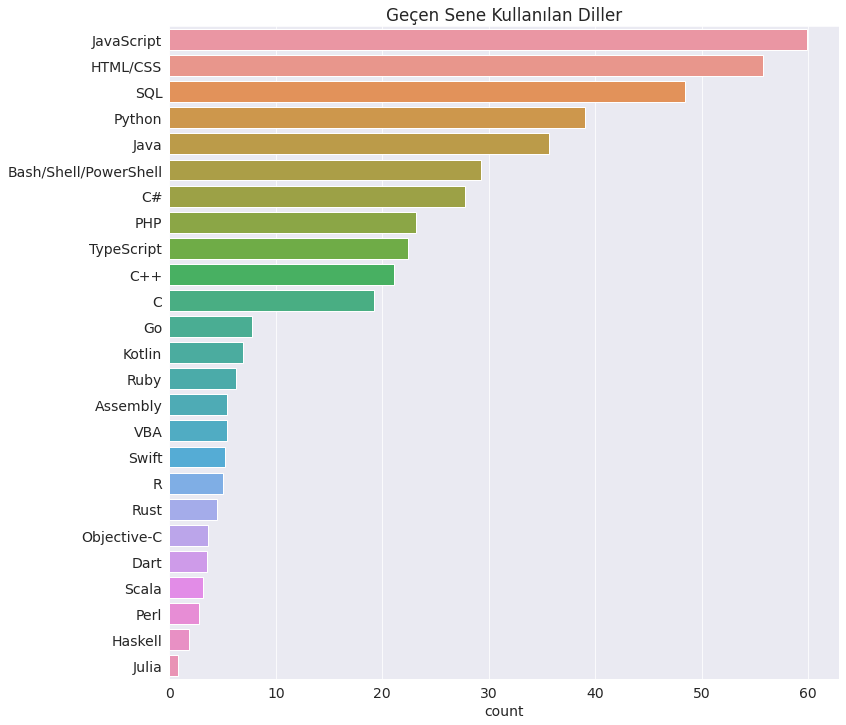

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Geçen Sene Kullanılan Diller");
plt.xlabel('count');

Web geliştirme günümüzün en çok aranan becerilerinden biri olduğu için Javascript ve HTML/CSS belki de şaşırtıcı olmayan bir şekilde en üst sıralarda yer alıyor. Ayrıca, başlaması en kolay olanlardan biri olur. SQL, ilişkisel veritabanlarıyla çalışmak için gereklidir. Bu nedenle çoğu programcının SQL ile düzenli olarak çalışması şaşırtıcı değildir. Python, yirmi yılı aşkın süredir sunucu ve uygulama geliştirme için endüstri standardı olan Java'yı geride bırakarak diğer geliştirme biçimleri için popüler bir seçim gibi görünüyor.

**Alıştırmalar**:

* Öğrencilerin en çok kullandığı diller nelerdir? Liste, profesyonel geliştiriciler tarafından kullanılan en yaygın dillerle nasıl karşılaştırılır?
* Kendilerini "Developer, front-end" olarak tanımlamayan katılımcılar arasında en yaygın kullanılan diller nelerdir?
* Veri bilimi ile ilgili alanlarda çalışan katılımcılar arasında en yaygın kullanılan diller nelerdir?
* 35 yaşından büyük developer'lar tarafından en yaygın kullanılan diller nelerdir?
* Kendi ülkenizde developer'lar tarafından en yaygın olarak kullanılan diller nelerdir?

#### Soru: İnsanlar önümüzdeki yıl en çok hangi dilleri öğrenmek istiyor?

Bunun için, bir öncekine benzer işlemlerle `LanguageDesireNextYear` sütununu kullanabiliriz.

In [ ]:
ilgilenilen_diller_df = split_multicolumn(anket_df.LanguageDesireNextYear)

In [ ]:
ilgilenilen_dillerin_orani = ilgilenilen_diller_df.mean().sort_values(ascending=False) * 100

In [ ]:
ilgilenilen_dillerin_orani

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

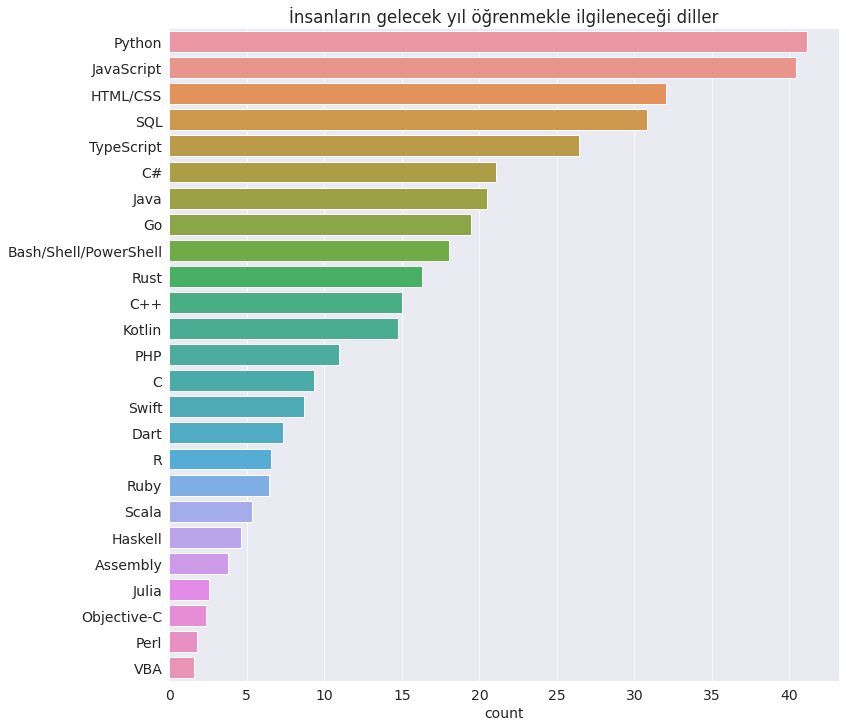

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=ilgilenilen_dillerin_orani, y=ilgilenilen_dillerin_orani.index)
plt.title("İnsanların gelecek yıl öğrenmekle ilgileneceği diller");
plt.xlabel('count');

Bir kez daha, Python'un çoğu insanın öğrenmekle ilgilendiği dil olması şaşırtıcı değil. Çünkü öğrenmesi kolay, genel amaçlı bir programlama dilidir ve çeşitli alanlara çok uygundur: uygulama geliştirme, sayısal hesaplama, veri analizi, makine öğrenme, büyük veri (big data), bulut otomasyonu (cloud automation), web kazıma (web scraping), komut dosyası oluşturma (scripting) vb. Bu analiz için Python kullanıyoruz, bu yüzden iyi bir şirketteyiz!

**Alıştırmalar**: "En yaygın dilleri" "insanların öğrenmek/kullanmakla ilgilendikleri diller" ile değiştirerek önceki sorudaki alıştırmaları tekrarlayalım.

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what we can do:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [ ]:
sevilen_diller_df = languages_worked_df & languages_interested_df

In [ ]:
sevilen_diller_orani = (sevilen_diller_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

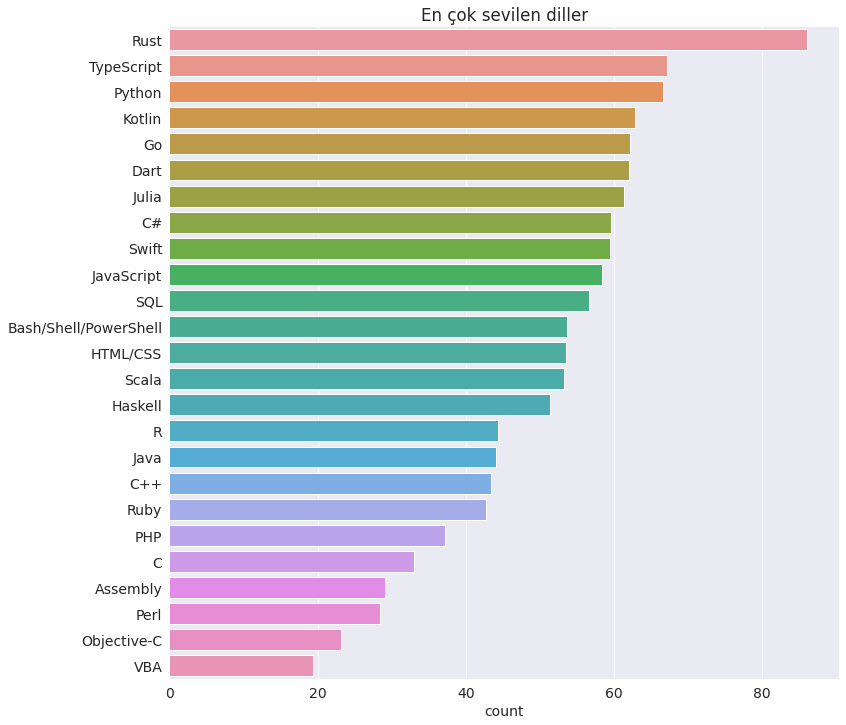

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=sevilen_diller_orani, y=sevilen_diller_orani.index)
plt.title("En çok sevilen diller");
plt.xlabel('count');

[Rust](https://www.rust-lang.org) has been StackOverflow's most-loved language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

**Exercises:** What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year. Hint: `~languages_interested_df`.

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [ ]:
ulkeler_df = anket_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [ ]:
high_response_countries_df = ulkeler_df.loc[anket_df.Country.value_counts() > 250].head(15)

In [ ]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

**Exercises:**

* How do the average work hours compare across continents? You may find this list of [countries in each continent](https://hub.jovian.ml/wp-content/uploads/2020/09/countries.csv) useful.
* Which role has the highest average number of hours worked per week? Which one has the lowest?
* How do the hours worked compare between freelancers and developers working full-time?

#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [ ]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [ ]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

NameError: ignored

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

In [ ]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

**Exercises**:

* How does programming experience change opinions & preferences? Repeat the entire analysis while comparing the responses of people who have more than ten years of professional programming experience vs. those who don't. Do you see any interesting trends?
* Compare the years of professional coding experience across different genders. 


Hopefully, you are already thinking of many more questions you'd like to answer using this data. Use the empty cells below to ask and answer more questions.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## Alıştırmalar

There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:

- Repeat the analysis for different age groups & genders, and compare the results
- Pick a different set of columns (we chose 20 out of 65) to analyze other facets of the data
- Prepare an analysis focusing on diversity - and identify areas where underrepresented communities are at par with the majority (e.g., education) and where they aren't (e.g., salaries)
- Compare the results of this year's survey with the previous years and identify interesting trends


## Referanslar ve Gelecek Çalışmalar

Bu not defterinde kullanılan veri kümesi ve araçlar hakkında daha fazla bilgi edinmek için aşağıdaki kaynaklara göz atalım:

- Stack Overflow Developer Anketi: https://insights.stackoverflow.com/survey
- Pandas kullanım kılavuzu: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib kullanım kılavuzu: https://matplotlib.org/3.3.1/users/index.html
- Seaborn kullanım kılavuzu & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python kütüphanesi: https://github.com/JovianML/opendatasets